# Task 1 Marketing Handbook or Guideline

## Principal Component Analysis

### Data Preparation

In [1]:
import pandas as pd

# Direct download URL
url = "https://drive.google.com/uc?id=127YdqJxJiwWcSoBTWRhv2eaLYj4U76CG"

# Load the file into a DataFrame
data_pca = pd.read_csv(url)

# Define the investment-grade ratings >> New Y
investment_grades = ["A", "A-", "A+", "AA", "AA-", "AA+", "AAA", "BBB", "BBB+", "BBB-"]

# Create a new column 'investment_grade'
data_pca['Investment_grade'] = data_pca['Rating'].apply(lambda x: 1 if x in investment_grades else 0)

# Drop the 'Rating' column
data_pca = data_pca.drop(columns=['Rating'])

data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7805 entries, 0 to 7804
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Current Ratio                  7805 non-null   float64
 1   Long-term Debt / Capital       7805 non-null   float64
 2   Debt/Equity Ratio              7805 non-null   float64
 3   Gross Margin                   7805 non-null   float64
 4   Operating Margin               7805 non-null   float64
 5   EBIT Margin                    7805 non-null   float64
 6   EBITDA Margin                  7805 non-null   float64
 7   Pre-Tax Profit Margin          7805 non-null   float64
 8   Net Profit Margin              7805 non-null   float64
 9   Asset Turnover                 7805 non-null   float64
 10  ROE - Return On Equity         7805 non-null   float64
 11  Return On Tangible Equity      7805 non-null   float64
 12  ROA - Return On Assets         7805 non-null   f

In [2]:
# Seperate X and Y for PCA
X_PCA = data_pca.iloc[:,:-1]
y_PCA = data_pca.iloc[:,-1]

y_PCA.value_counts()

,count
Investment_grade,
1,5099
0,2706


In [3]:
# Standardize the independent variables X
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to your dataset
scaler = StandardScaler()
X_PCA = scaler.fit_transform(X_PCA)

### PCA Implementation

In [4]:
from sklearn.decomposition import PCA

# Perform PCA with all components
pca = PCA()
X_pca_transformed = pca.fit_transform(X_PCA)

In [5]:
# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Get principal components (loadings)
pcs = pca.components_

# Combine everything into a single DataFrame
pcs_with_variance = pd.DataFrame(pcs, columns=[f"Feature_{i+1}" for i in range(pcs.shape[1])])
pcs_with_variance['Explained Variance'] = explained_variance_ratio
pcs_with_variance['Cumulative Explained Variance'] = cumulative_variance
pcs_with_variance.index = [f"PC_{i+1}" for i in range(pcs.shape[0])]

# Print the DataFrame
print("\nPrincipal Components with Explained Variance and Cumulative Variance:")
pcs_with_variance


Principal Components with Explained Variance and Cumulative Variance:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Explained Variance,Cumulative Explained Variance
PC_1,-0.023676,0.021310,0.002759,0.093594,0.408174,0.408229,0.381926,0.403431,0.393102,-0.045635,0.003032,0.012910,0.356128,0.232363,0.097582,-0.034750,0.351463,0.351463
PC_2,0.065329,0.289414,0.051852,-0.555748,-0.042271,-0.042682,-0.202144,0.022708,0.043834,0.595066,0.074935,0.116466,0.196406,0.370331,0.041142,0.053125,0.104899,0.456362
PC_3,-0.031041,-0.036882,0.697564,0.059118,-0.003946,-0.003928,0.007212,-0.002417,-0.000913,-0.042301,0.702433,0.009906,-0.007167,-0.025804,-0.047109,-0.096224,0.091591,0.547952
PC_4,-0.069226,0.724248,0.004688,0.318885,-0.076033,-0.075919,0.018222,-0.099799,-0.106914,-0.301066,0.006640,-0.075476,-0.071547,0.476551,-0.055412,0.063447,0.086049,0.634001
PC_5,-0.129890,-0.038546,0.110861,0.048175,-0.008824,-0.007543,0.007346,-0.016313,-0.028068,0.007191,0.021552,-0.059051,-0.034754,-0.040032,0.643360,0.738284,0.068099,0.702099
PC_6,0.870450,0.025547,0.069657,-0.119501,0.021015,0.020810,-0.030534,0.019519,0.034999,-0.168526,-0.006566,-0.422074,0.010558,0.002001,0.014398,0.110477,0.064421,0.766520
PC_7,0.398083,0.010546,0.021476,0.089602,-0.016918,-0.016963,0.000055,-0.013679,-0.009580,-0.159215,-0.015889,0.890678,0.015581,0.002864,0.028126,0.110108,0.061298,0.827819
PC_8,0.068227,0.124932,-0.023089,-0.045997,-0.013224,-0.010697,0.008108,-0.043534,-0.041902,-0.037270,-0.005980,0.021804,-0.122151,-0.039133,0.744761,-0.632503,0.053831,0.881650
PC_9,-0.094209,0.100095,0.669299,-0.217705,0.052208,0.052202,0.048123,0.024936,0.011413,-0.105551,-0.664133,0.026537,-0.117394,-0.077648,-0.059177,-0.031612,0.033556,0.915205
PC_10,0.136781,-0.260267,0.211079,0.624587,-0.147728,-0.147839,-0.121194,-0.062531,-0.062077,0.404408,-0.241962,-0.061655,0.333836,0.246390,0.068422,-0.100145,0.031591,0.946796


In [6]:
# Demonstrated only EV and CEV
pcs_with_variance.iloc[:,-2:].T

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
Explained Variance,0.351463,0.104899,0.091591,0.086049,0.068099,0.064421,0.061298,0.053831,0.033556,0.031591,0.024335,0.014870,0.008514,0.003615,0.001852,0.000018
Cumulative Explained Variance,0.351463,0.456362,0.547952,0.634001,0.702099,0.766520,0.827819,0.881650,0.915205,0.946796,0.971132,0.986001,0.994515,0.998130,0.999982,1.000000


In [7]:
# Perform PCA with 9 components
pca = PCA(n_components=9)
X_pca_transformed = pca.fit_transform(X_PCA)

# Check the shape of the transformed data
print("Shape of Transformed Data:", X_pca_transformed.shape)

Shape of Transformed Data: (7805, 9)


In [8]:
# The first row of the transformed data
X_pca_transformed[0]

array([ 0.61204115, -1.47455225,  0.1183241 ,  0.61254654,  0.26059453,
       -0.37974138,  0.05509136,  0.15423694, -0.09356815])

# K-mean Clusteering
The results are included in task2

## LASSO

In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Getting historical market data from SPY
df = yf.download("SPY", start="2000-01-01", end="2022-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [10]:
df["Ret"] = df["Close"].pct_change()

name = "Ret"
df["Ret10_i"] = (
    df[name].rolling(10).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 10) - 1))
)
df["Ret25_i"] = (
    df[name].rolling(25).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 25) - 1))
)
df["Ret60_i"] = (
    df[name].rolling(60).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 60) - 1))
)
df["Ret120_i"] = (
    df[name].rolling(120).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 120) - 1))
)
df["Ret240_i"] = (
    df[name].rolling(240).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 240) - 1))
)

del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]


df = df.dropna()
df.tail(10)

Price,Ret,Ret10_i,Ret25_i,Ret60_i,Ret120_i,Ret240_i
Ticker,,,,,,
Date,,,,,,
2021-12-17,-0.010643,0.176478,-0.019749,0.067481,0.066045,0.092182
2021-12-20,-0.010633,-0.048308,-0.092544,0.046909,0.056429,0.081573
2021-12-21,0.017759,-0.076998,-0.023541,0.081044,0.066503,0.086544
2021-12-22,0.009999,-0.003981,0.000453,0.131609,0.068450,0.093514
2021-12-23,0.006222,0.125869,0.034999,0.139155,0.075143,0.096013
2021-12-27,0.014152,0.172776,0.077672,0.183143,0.083921,0.100753
2021-12-28,-0.000817,0.253751,0.081564,0.162054,0.090063,0.101875
2021-12-29,0.001279,0.335815,0.097969,0.185859,0.082273,0.105461


In [11]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso


In [12]:
X, y = df.iloc[:, 0:-1], df.iloc[:, -1]
print(X.shape, y.shape)

(5296, 5) (5296,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=int(len(y) * 0.5), shuffle=False
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2648, 5) (2648, 5) (2648,) (2648,)


In [14]:
# Train the model
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
y_pred_Lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [15]:

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_test_lasso - y_test) ** 2)
print("Mean squared error on test set", mean_squared_error)

Mean squared error on test set 0.0017667436309280985


In [16]:
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns.to_flat_index()  # Convert MultiIndex to a flat index
lasso_coeff["Coefficient Estimate"] = pd.Series(lasso.coef_)

print(lasso_coeff)

        Columns  Coefficient Estimate
0       (Ret, )             -0.000000
1   (Ret10_i, )             -0.002730
2   (Ret25_i, )             -0.018217
3   (Ret60_i, )             -0.022284
4  (Ret120_i, )              0.572252


# Task 2 Technical Section : Hyperparameter Tuning

## PCA

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Direct download URL
url = "https://drive.google.com/uc?id=127YdqJxJiwWcSoBTWRhv2eaLYj4U76CG"

# Load the file into a DataFrame
data_pca = pd.read_csv(url)

# Define the investment-grade ratings >> New Y
investment_grades = ["A", "A-", "A+", "AA", "AA-", "AA+", "AAA", "BBB", "BBB+", "BBB-"]

# Create a new column 'investment_grade'
data_pca['Investment_grade'] = data_pca['Rating'].apply(lambda x: 1 if x in investment_grades else 0)

# Drop the 'Rating' column
data_pca = data_pca.drop(columns=['Rating'])

# Seperate X and Y for PCA
X_PCA = data_pca.iloc[:,:-1]
y_PCA = data_pca.iloc[:,-1]

# Standardize the independent variables X
scaler = StandardScaler()
X_PCA = scaler.fit_transform(X_PCA)

In [18]:
# Perform PCA with all components
pca = PCA()
X_pca_transformed = pca.fit_transform(X_PCA)

# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Explained variance ratio:", explained_variance_ratio)
print("\nCumulative explained variance:", cumulative_variance)

Explained variance ratio: [3.51462771e-01 1.04898795e-01 9.15905912e-02 8.60486772e-02
 6.80986035e-02 6.44209883e-02 6.12984153e-02 5.38309403e-02
 3.35555150e-02 3.15911803e-02 2.43351146e-02 1.48697908e-02
 8.51375837e-03 3.61481517e-03 1.85158253e-03 1.84615098e-05]

Cumulative explained variance: [0.35146277 0.45636157 0.54795216 0.63400083 0.70209944 0.76652043
 0.82781884 0.88164978 0.9152053  0.94679648 0.97113159 0.98600138
 0.99451514 0.99812996 0.99998154 1.        ]


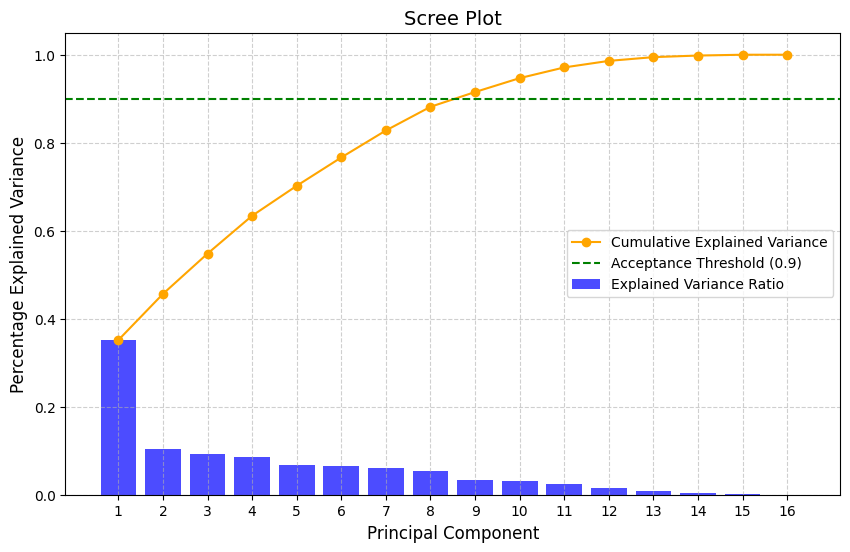

In [19]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label="Explained Variance Ratio", color='blue')

# Line plot for cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange', label="Cumulative Explained Variance")

# Draw a horizontal line at 0.9 for the acceptance threshold
plt.axhline(y=0.9, color='green', linestyle='--', label="Acceptance Threshold (0.9)")

# Adding titles and labels
plt.title('Scree Plot', fontsize=14)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Percentage Explained Variance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.show()

## K-Mean clustering

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

[*********************100%***********************]  5 of 5 completed


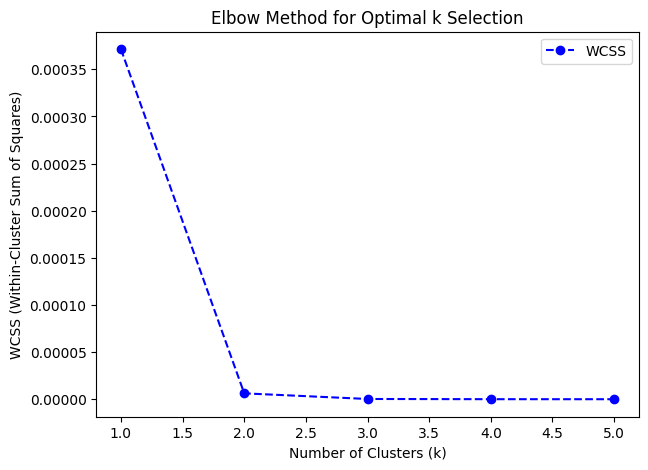

In [21]:
# Download stock data
stocks = ['AAPL', 'TSLA', 'AMZN', 'MSFT', 'GOOGL']
data = yf.download(stocks, start="2020-01-01", end="2024-01-01")['Close']

# Compute daily returns
returns = data.pct_change().dropna()

# Compute mean return & volatility
mean_return = returns.mean()
volatility = returns.std()

# Create feature set
features = pd.DataFrame({'Mean Return': mean_return, 'Volatility': volatility})
X = features.values

# Elbow Method to find optimal k
wcss = []
k_values = range(1, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(7,5))
plt.plot(k_values, wcss, marker='o', linestyle='--', color='b', label="WCSS")
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k Selection')
plt.legend()
plt.show()

In [22]:
# Apply K-Means with chosen k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels
features['Cluster'] = clusters
print(features)

        Mean Return  Volatility  Cluster
Ticker                                  
AAPL       0.001187    0.021146        2
AMZN       0.000750    0.023741        0
GOOGL      0.000934    0.021124        2
MSFT       0.001095    0.020546        2
TSLA       0.003070    0.042902        1


## LASSO


[*********************100%***********************]  1 of 1 completed


Optimal Lambda from LassoCV: 0.0001
Optimal Lambda from GridSearchCV: 0.0001
Optimal Lambda from RandomizedSearchCV: 0.00030888435964774815
Train MSE: 0.0023, Test MSE: 0.0023
Train R²: 0.5453, Test R²: 0.5470


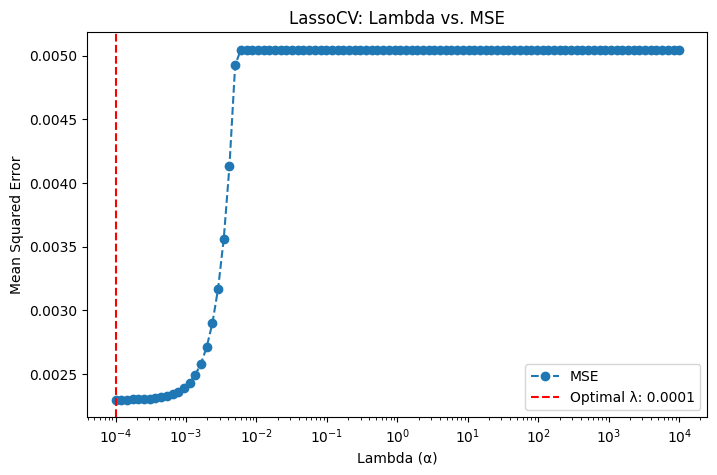

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Getting historical market data from SPY (ETF)
df = yf.download("SPY", start="2000-01-01", end="2022-01-01")

df["Ret"] = df["Close"].pct_change()

name = "Ret"
df["Ret10_i"] = (
    df[name].rolling(10).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 10) - 1))
)
df["Ret25_i"] = (
    df[name].rolling(25).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 25) - 1))
)
df["Ret60_i"] = (
    df[name].rolling(60).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 60) - 1))
)
df["Ret120_i"] = (
    df[name].rolling(120).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 120) - 1))
)
df["Ret240_i"] = (
    df[name].rolling(240).apply(lambda x: 100 * ((np.prod(1 + x)) ** (1 / 240) - 1))
)

del df["Open"]
del df["Close"]
del df["High"]
del df["Low"]
del df["Volume"]


df = df.dropna()
df.tail(10)

# Define X and y before splitting
# X contains all columns except the last one (Ret240_i)
X = df.iloc[:, :-1]
# y contains only the last column (Ret240_i)
y = df.iloc[:, -1]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# Step 1: Cross-Validation to Find Optimal Lambda (alpha)
# ------------------------
lasso_cv = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best Lambda
best_lambda = lasso_cv.alpha_
print(f"Optimal Lambda from LassoCV: {best_lambda}")

# ------------------------
# Step 2: Hyperparameter Tuning using Grid Search
# ------------------------
param_grid = {'alpha': np.logspace(-4, 4, 50)}
lasso = Lasso()

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_lambda_grid = grid_search.best_params_['alpha']
print(f"Optimal Lambda from GridSearchCV: {best_lambda_grid}")

# ------------------------
# Step 3: Hyperparameter Tuning using Randomized Search
# ------------------------
param_dist = {'alpha': np.logspace(-4, 4, 50)}
random_search = RandomizedSearchCV(lasso, param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=20, random_state=42)
random_search.fit(X_train, y_train)

best_lambda_random = random_search.best_params_['alpha']
print(f"Optimal Lambda from RandomizedSearchCV: {best_lambda_random}")

# ------------------------
# Step 4: Train the Best Lasso Model and Evaluate
# ------------------------
lasso_best = Lasso(alpha=best_lambda)
lasso_best.fit(X_train, y_train)

# Predictions
y_pred_train = lasso_best.predict(X_train)
y_pred_test = lasso_best.predict(X_test)

# Performance Metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# ------------------------
# Step 5: Visualization of Lambda vs. MSE
# ------------------------
plt.figure(figsize=(8, 5))
plt.plot(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1), marker='o', linestyle='--', label="MSE")
plt.axvline(best_lambda, color='red', linestyle='--', label=f"Optimal λ: {best_lambda:.4f}")
plt.xscale("log")
plt.xlabel("Lambda (α)")
plt.ylabel("Mean Squared Error")
plt.title("LassoCV: Lambda vs. MSE")
plt.legend()
plt.show()

# Task 3: Marketing Alpha

## PCA

### Data Preparation

In [24]:
import pandas as pd
import numpy as np

# Direct download URL
url = "https://drive.google.com/uc?id=127YdqJxJiwWcSoBTWRhv2eaLYj4U76CG"

# Load the file into a DataFrame
data_pca = pd.read_csv(url)

# Define the investment-grade ratings >> New Y
investment_grades = ["A", "A-", "A+", "AA", "AA-", "AA+", "AAA", "BBB", "BBB+", "BBB-"]

# Create a new column 'investment_grade'
data_pca['Investment_grade'] = data_pca['Rating'].apply(lambda x: 1 if x in investment_grades else 0)

# Drop the 'Rating' column
data_pca = data_pca.drop(columns=['Rating'])

# Seperate X and Y for PCA
X_PCA = data_pca.iloc[:,:-1]
y_PCA = data_pca.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for PCA
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_PCA, y_PCA, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_pca_train_scaled = scaler.fit_transform(X_pca_train)

# Use the same scaler to transform the test data
X_pca_test_scaled = scaler.transform(X_pca_test)

### PCA Implementation

In [27]:
from sklearn.decomposition import PCA

# Perform PCA with all components
pca = PCA()

# Fit PCA to the training data without transforming
pca.fit(X_pca_train_scaled)

# Get explained variance and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Explained variance ratio:", explained_variance_ratio)
print("\nCumulative explained variance:", cumulative_variance)

Explained variance ratio: [3.51040010e-01 1.04290124e-01 9.50001297e-02 9.04108559e-02
 6.75834511e-02 6.45295586e-02 6.10600485e-02 5.44572451e-02
 3.13359300e-02 2.97609955e-02 2.29941542e-02 1.53371983e-02
 6.80056931e-03 3.61203083e-03 1.77449812e-03 1.32006241e-05]

Cumulative explained variance: [0.35104001 0.45533013 0.55033026 0.64074112 0.70832457 0.77285413
 0.83391418 0.88837142 0.91970735 0.94946835 0.9724625  0.9877997
 0.99460027 0.9982123  0.9999868  1.        ]


In [28]:
# Refit PCA with 90% of the variance
pca = PCA(n_components=0.90)

# Fit PCA to the training data
X_pca_train_reduced = pca.fit_transform(X_pca_train_scaled)

# Transform the test data using the same PCA model
X_pca_test_reduced = pca.transform(X_pca_test_scaled)

# Print the number of components selected and the cumulative explained variance
print("Number of components selected:", pca.n_components_)
print("Cumulative explained variance:", round(pca.explained_variance_ratio_.cumsum()[-1], 4))

Number of components selected: 9
Cumulative explained variance: 0.9197


### PCA-Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model on the PCA-transformed training data
log_reg.fit(X_pca_train_reduced, y_pca_train)

# Predict on the training data
y_train_pred = log_reg.predict(X_pca_train_reduced)

# Predict on the test data
y_test_pred = log_reg.predict(X_pca_test_reduced)

# Evaluate performance on training data
print("Training Performance:")
print("\nClassification Report:\n", classification_report(y_pca_train, y_train_pred))

# Evaluate performance on test data
print("Testing Performance:")
print("\nClassification Report:\n", classification_report(y_pca_test, y_test_pred))

Training Performance:

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.27      0.40      2184
           1       0.71      0.95      0.81      4060

    accuracy                           0.71      6244
   macro avg       0.72      0.61      0.60      6244
weighted avg       0.72      0.71      0.67      6244

Testing Performance:

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.29      0.42       522
           1       0.73      0.96      0.83      1039

    accuracy                           0.73      1561
   macro avg       0.75      0.62      0.62      1561
weighted avg       0.74      0.73      0.69      1561



## K-Mean clustering
The code for this part is included in related Task 2 Technical Section : Hyperparameter Tuning

## LASSO

The code for this part is included in related Task 2 Technical Section : Hyperparameter Tuning